In [1]:
import time
import numpy as np
import pandas as pd
from binary_nn import BinaryNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

np.random.seed(1)

# Data Prep

In [2]:
X_train = np.loadtxt("churn-data/x_train.csv")
y_train = np.loadtxt("churn-data/y_train.csv")
X_test = np.loadtxt("churn-data/x_test.csv")
y_test = np.loadtxt("churn-data/y_test.csv")

## Normalization

In [3]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
norm_X_train = scaler.transform(X_train)
norm_X_test = scaler.transform(X_test)

## Reshaping

In [5]:
norm_X_train = norm_X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
norm_X_test = norm_X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [6]:
print(norm_X_train.shape)
print(y_train.shape)
print(norm_X_test.shape)
print(y_test.shape)

(39, 4930)
(1, 4930)
(39, 2113)
(1, 2113)


# Binary Neural Network

In [7]:
churn_nn = BinaryNN(norm_X_train, y_train)

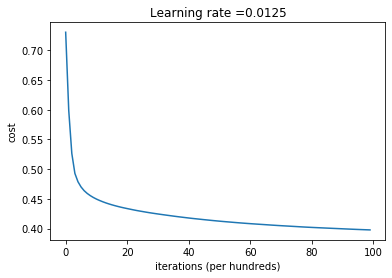

In [8]:
churn_nn.L_layer_model(layer_dimensions = [39, 20, 10, 5, 1],
                       print_cost = False,
                       num_iterations = 10000,
                       learning_rate = 0.0125)

## Training Performance

In [9]:
pred_train = churn_nn.predict(norm_X_train, y_train)

Accuracy: 0.8176470588235294


In [10]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

Precision: 0.6857410881801126
Recall: 0.5644787644787644


In [11]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.669371,0.067951
label: 1,0.114402,0.148276


## Test Performance

In [12]:
pred_test = churn_nn.predict(norm_X_test, y_test)

Accuracy: 0.8026502602934216


In [13]:
print("Precision:", precision_score(y_test[0], pred_test[0]))
print("Recall:", recall_score(y_test[0], pred_test[0]))

Precision: 0.6666666666666666
Recall: 0.5470383275261324


In [14]:
tn, fp, fn, tp = confusion_matrix(y_test[0], pred_test[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.654046,0.074302
label: 1,0.123048,0.148604


# Cat Classifier

In [15]:
cat_X_train = np.loadtxt("cat-data/cat_train_x.csv")
cat_y_train = np.loadtxt("cat-data/cat_train_y.csv")
cat_X_test = np.loadtxt("cat-data/cat_test_x.csv")
cat_y_test = np.loadtxt("cat-data/cat_test_y.csv")

In [16]:
cat_y_train = cat_y_train.reshape(1, cat_y_train.shape[0])
cat_y_test = cat_y_test.reshape(1, cat_y_test.shape[0])

In [17]:
print(cat_X_train.shape)
print(cat_y_train.shape)
print(cat_X_test.shape)
print(cat_y_test.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [18]:
cat_layers_dims = [12288, 20, 7, 5, 1]

In [19]:
cat_nn = BinaryNN(X = cat_X_train, Y = cat_y_train)

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


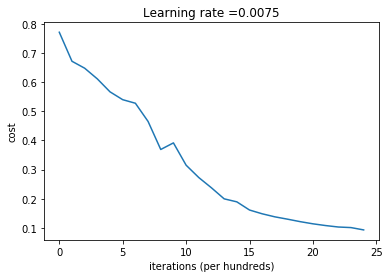

In [20]:
cat_nn.L_layer_model(layer_dimensions = cat_layers_dims, print_cost = True)

In [21]:
cat_pred_train = cat_nn.predict(X = cat_X_train, y = cat_y_train)

Accuracy: 0.9856459330143539


In [22]:
print("Precision:", precision_score(cat_y_train[0], cat_pred_train[0]))
print("Recall:", recall_score(cat_y_train[0], cat_pred_train[0]))

Precision: 1.0
Recall: 0.9583333333333334


In [23]:
tn, fp, fn, tp = confusion_matrix(cat_y_train[0], cat_pred_train[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.655502,0.000000
label: 1,0.014354,0.330144


In [24]:
cat_pred_test = cat_nn.predict(X = cat_X_test, y = cat_y_test)

Accuracy: 0.8


In [25]:
print("Precision:", precision_score(cat_y_test[0], cat_pred_test[0]))
print("Recall:", recall_score(cat_y_test[0], cat_pred_test[0]))

Precision: 0.8108108108108109
Recall: 0.9090909090909091


In [26]:
tn, fp, fn, tp = confusion_matrix(cat_y_test[0], cat_pred_test[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.20,0.14
label: 1,0.06,0.60


In [27]:
# pred_train = np.where(A4 > 0.5, 1, 0)
# accuracy_score(cat_y_train[0], pred_train[0])